<a href="https://colab.research.google.com/github/akrawat912/Deep-Learning/blob/master/Question_Answering_with_a_Fine_Tuned_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     |████████████████████████████████| 675kB 2.8MB/s 
     |████████████████████████████████| 890kB 13.4MB/s 
     |████████████████████████████████| 3.8MB 12.0MB/s 
     |████████████████████████████████| 1.1MB 41.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=04274fdcaf89f53914020c12bf2d9537bf71bb0ff0a3d521bc545531ad4611b1
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import torch
import tensorflow as tf
import transformers
from transformers import TFBertForQuestionAnswering, BertTokenizer, BertConfig
import pickle

In [ ]:
# downloading pretrained uad')
model = TFBertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [ ]:
ref_text = "Virat Kohli is an Indian cricketer who currently captains the India national team. A right-handed top-order batsman, Kohli is regarded as one of the best batsmen"
 
quest = 'Who is Virat Kohli?'

In [ ]:
# special tokens [CLS] and [SEP] which is input format for BERT question answering task
token_example = tokenizer.encode(quest,add_special_tokens = True)
token_example

[101, 2040, 2003, 6819, 8609, 12849, 27766, 1029, 102]

In [ ]:
for id, word in zip(token_example, list(tokenizer.convert_ids_to_tokens(token_example))):
  print("{} -- {}".format(word, id))

[CLS] -- 101
who -- 2040
is -- 2003
vi -- 6819
##rat -- 8609
ko -- 12849
##hli -- 27766
? -- 1029
[SEP] -- 102


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
gdrive = '/content/drive/My Drive/Colab Notebooks/question_answering/'
# saving model and tokens
model.save_pretrained(gdrive) 
tokenizer.save_pretrained(gdrive)

('/content/drive/My Drive/Colab Notebooks/question_answering/vocab.txt',
 '/content/drive/My Drive/Colab Notebooks/question_answering/special_tokens_map.json',
 '/content/drive/My Drive/Colab Notebooks/question_answering/added_tokens.json')

In [ ]:
# loading saved model and tokens
TFBertForQuestionAnswering.from_pretrained(gdrive)
BertTokenizer.from_pretrained(gdrive)

## Visual scores

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (16,8)

In [ ]:
input_ids = tf.constant (tokenizer.encode(quest,ref_text, add_special_tokens = True))[None,:] 
outputs = model(input_ids)
start_scores, end_scores = outputs[: 2]
start_scores, end_scores

(<tf.Tensor: shape=(1, 46), dtype=float32, numpy=
 array([[-5.7381864 , -6.2087984 , -6.829249  , -5.163429  , -7.346818  ,
         -7.774948  , -7.6652365 , -8.544592  , -5.7381277 , -1.0552279 ,
         -5.4956617 , -4.357353  , -5.7703705 , -2.3961685 ,  4.8756514 ,
          4.305537  ,  0.93143755, -5.168442  , -2.8668485 , -1.2123886 ,
         -3.959005  , -0.25701892, -5.010184  , -5.3229527 , -5.7381177 ,
          0.8426158 ,  0.29385686, -7.0002527 , -4.148472  , -1.9901843 ,
         -7.241566  , -4.502934  , -2.0224924 , -6.4543014 , -1.985726  ,
         -6.4153605 , -5.5145664 , -2.622113  , -5.84562   , -2.5009797 ,
         -6.68947   , -5.208887  , -3.294163  , -3.178192  , -6.035188  ,
         -5.738126  ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 46), dtype=float32, numpy=
 array([[-0.8770737 , -5.4017687 , -5.387519  , -6.403419  , -5.029053  ,
         -6.931593  , -3.8073583 , -5.9617987 , -0.87696296, -5.239266  ,
         -3.035342  , -6.0203767 , -1.3161023

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(input_ids[0].numpy())

In [ ]:
s_scores = start_scores.numpy().flatten()
e_scores = end_scores.numpy().flatten()
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

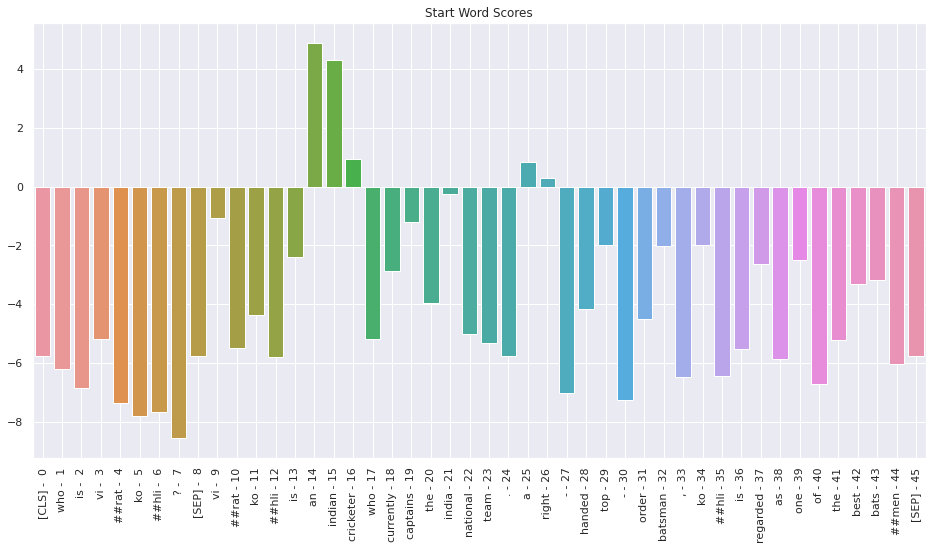

In [ ]:
# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()
# for question 'Who is Virat Kohli?' high start_score for 'an'

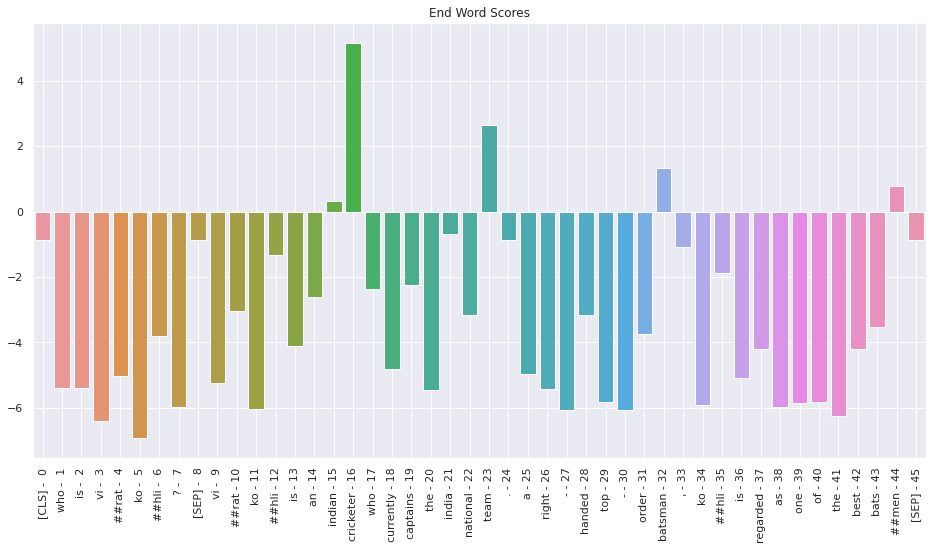

In [ ]:
# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()
# for question 'Who is Virat Kohli?' high end_score for 'Indian'

In [ ]:
def answer_question(quest, ref_text):
    '''
    Takes a `question` string and an `reference_text` string (which contains the
    answer), and identifies the words within the `reference_text` that are the
    answer. Prints them out.
    '''
    # ======== Tokenize ========
    # Apply the tokenizer to the input text, treating them as a text-pair.

    input_ids = tf.constant (tokenizer.encode(quest,ref_text, add_special_tokens = True))[None,:] 

    outputs = model(input_ids)
    start_scores, end_scores = outputs[: 2]

    answer_start = tf.argmax(start_scores[0]).numpy()
    answer_end = tf.argmax(end_scores[0]).numpy()

    # Get the string versions of the input tokens.
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0].numpy())

    # Start with the first token.
    answer = tokens[answer_start]

    # Select the remaining answer tokens and join them with whitespace.
    for i in range(answer_start + 1, answer_end + 1):
      # If it's a subword token, then recombine it with the previous token.
      if tokens[i][0:2] == '##':
        answer += tokens[i][2:]
        
      # Otherwise, add a space then the token.
      else:
        answer += ' ' + tokens[i]

    return answer

In [ ]:
ref_text = "Virat Kohli is an Indian cricketer who currently captains the India national team. A right-handed top-order batsman, Kohli is regarded as one of the best batsmen"
 
quest = 'Who is Virat Kohli?'

In [ ]:
print(answer_question(quest, ref_text))

an indian cricketer


In [ ]:
print(answer_question('What Virat Kohli do?', ref_text))

captains the india national team
